In [1]:
# from coffea.nanoevents import TreeMakerSchema, BaseSchema, NanoEventsFactory
# from fit_functions import fit_unbinned_double_gauss_Z, fit_unbinned_gauss_Z_with_background
import matplotlib.pyplot as plt
import uproot as up
import numpy as np
import pandas as pd
import awkward as ak
import mplhep as hep
hep.style.use(hep.style.CMS)
import ROOT

Welcome to JupyROOT 6.26/10


In [2]:
dataset = '../outputs/ZeeYuu_Run3_Candidates.root'
file = up.open(dataset)

In [3]:
events = file['ntuple;1']
columns = ['Event', 'B_Ups1_mass', 'B_Ups2_mass', 'FourL_mass', 'FourL_VtxProb']
branches = events.arrays(columns)

In [4]:
def print_summary(data, text):
    events = len(data)
    candidates = np.sum(ak.num(branches['FourL_mass'], axis=1))

    print(f"Number of candidates {text}: {candidates}")
    print(f"Number of events {text}: {events}")

In [5]:
print_summary(branches, 'Preselection')

Number of candidates Preselection: 171
Number of events Preselection: 1


In [6]:
# convert to pandas dataframe
data_dict = {key: ak.to_list(branches[key][0]) for key in branches.fields}
df_candi = pd.DataFrame(data_dict)

In [7]:
df_candi

,Event,B_Ups1_mass,B_Ups2_mass,FourL_mass,FourL_VtxProb
0,2.521151e+06,90.724831,9.220294,149.111908,0.114092
1,5.476386e+07,87.354362,9.420188,127.046837,0.164346
2,2.801221e+08,85.297157,9.489903,115.938644,0.770387
3,5.062614e+07,91.691513,9.522873,116.227249,0.917417
4,1.127241e+08,90.442764,9.235949,117.729897,0.581643
...,...,...,...,...,...
166,7.673822e+07,99.778969,9.392928,147.302017,0.340049
167,5.908776e+08,80.152718,9.433379,120.054527,0.308641
168,2.436594e+08,88.963516,9.467706,117.836624,0.030640
169,4.191215e+08,97.497017,9.386395,121.873390,0.289963


In [12]:
# duplicated events
df_candi[df_candi.duplicated(subset='Event', keep=False)].sort_values('Event')

,Event,B_Ups1_mass,B_Ups2_mass,FourL_mass,FourL_VtxProb
88,3.622425e+07,81.460564,9.207999,118.099083,0.173558
80,3.622425e+07,81.460564,9.207999,118.099083,0.173558
87,1.960594e+08,106.340538,9.378311,143.214600,0.021640
79,1.960594e+08,106.340538,9.378311,143.214600,0.021640
84,2.240764e+08,102.070122,9.218416,118.147316,0.181834
76,2.240764e+08,102.070122,9.218416,118.147316,0.181834
135,5.366053e+08,88.741211,9.200643,118.513519,0.206794
134,5.366053e+08,87.189751,9.200643,123.976845,0.141410
82,5.504956e+08,95.735413,9.458817,131.934174,0.591889
74,5.504956e+08,95.735413,9.458817,131.934174,0.591889


In [8]:
# for duplicated events, keep the one with the highest FourL_VtxProb
df_events = df_candi.sort_values('FourL_VtxProb', ascending=False).drop_duplicates('Event').sort_index()

In [9]:
df_events

,Event,B_Ups1_mass,B_Ups2_mass,FourL_mass,FourL_VtxProb
0,2.521151e+06,90.724831,9.220294,149.111908,0.114092
1,5.476386e+07,87.354362,9.420188,127.046837,0.164346
2,2.801221e+08,85.297157,9.489903,115.938644,0.770387
3,5.062614e+07,91.691513,9.522873,116.227249,0.917417
4,1.127241e+08,90.442764,9.235949,117.729897,0.581643
...,...,...,...,...,...
166,7.673822e+07,99.778969,9.392928,147.302017,0.340049
167,5.908776e+08,80.152718,9.433379,120.054527,0.308641
168,2.436594e+08,88.963516,9.467706,117.836624,0.030640
169,4.191215e+08,97.497017,9.386395,121.873390,0.289963


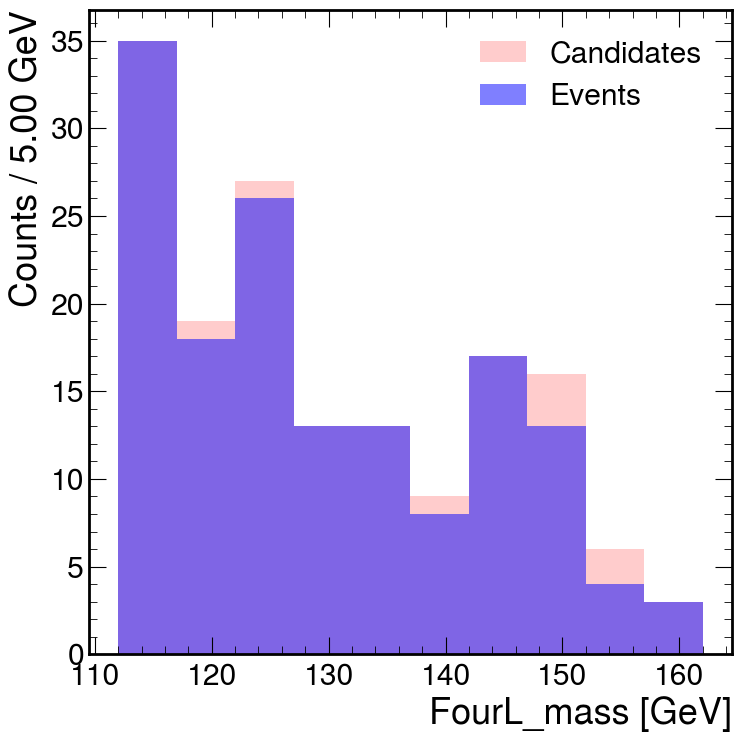

In [64]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 10, 112, 162
# plt.hist(ak.flatten(branches['FourL_mass']), bins=nbins, range=(xlow, xhigh))
plt.hist(df_candi['FourL_mass'], bins=nbins, range=(xlow, xhigh), color='r', alpha=0.2, label='Candidates')
plt.hist(df_events['FourL_mass'], bins=nbins, range=(xlow, xhigh), color='b', alpha=0.5, label='Events')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("FourL_mass [GeV]")
plt.legend()
plt.tight_layout()

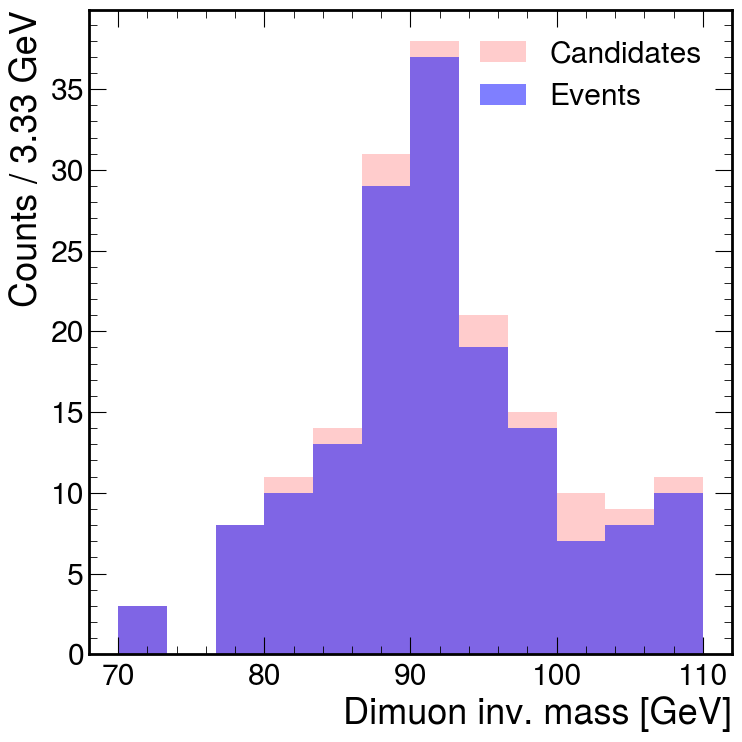

In [30]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 12, 70, 110
# plt.hist(ak.flatten(branches['B_Ups1_mass']), bins=nbins, range=(xlow, xhigh))
plt.hist(df_candi['B_Ups1_mass'], bins=nbins, range=(xlow, xhigh), color='r', alpha=0.2, label='Candidates')
plt.hist(df_events['B_Ups1_mass'], bins=nbins, range=(xlow, xhigh), color='b', alpha=0.5, label='Events')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("Dimuon inv. mass [GeV]")
plt.legend()
plt.tight_layout()

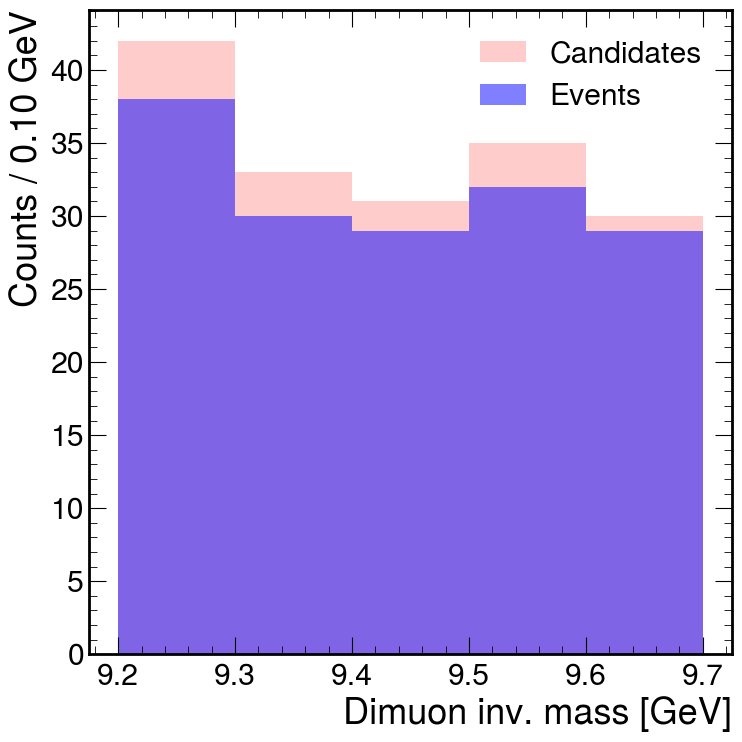

In [28]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 5, 9.2, 9.7
# plt.hist(ak.flatten(branches['B_Ups2_mass']), bins=nbins, range=(xlow, xhigh))
plt.hist(df_candi['B_Ups2_mass'], bins=nbins, range=(xlow, xhigh), color='r', alpha=0.2, label='Candidates')
plt.hist(df_events['B_Ups2_mass'], bins=nbins, range=(xlow, xhigh), color='b', alpha=0.5, label='Events')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("Dimuon inv. mass [GeV]")
plt.legend()
plt.tight_layout()

In [24]:
# concatenate the muons
B_J_mass = ak.concatenate([branches['B_J1_mass'], branches['B_J2_mass'], branches['B_J3_mass'], branches['B_J4_mass']], axis=0)

In [25]:
nbins, xlow, xhigh = 100, 70, 110
B_J_mass_candidates = ak.flatten(B_J_mass).to_numpy()
mass = ROOT.RooRealVar("B_J_mass", "DiMuon mass", xlow, xhigh, "GeV")
data = ROOT.RooDataSet.from_numpy({'B_J_mass': B_J_mass_candidates}, [mass])

[#0] WARNING:DataHandling -- RooDataSet.from_numpy() Ignored 413 out-of-range events


[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (background,gaussian)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a0           1.00000e-01  2.00000e+00   -1.00000e+01  1.00000e+01
     2 a1           1.00000e-01  2.00000e+00   -1.00000e+01  1.00000e+01
     3 a2           1.00000e-01  2.00000e+00   -1.00000e+01  1.00000e+01
     4 mean         9.10000e+01  2.00000e+00    8.00000e+01  1.00000e+02
     5 nbkg         1.00000e+04  2.50000e+03    0.00000e+00  2.50000e+04
     6 nsig         1.50000e+04  2.50000e+03    0.00000e+00  2.50000e+04
     7 sigma        2.00000e+00  9.50000e-01    1.00000e-01

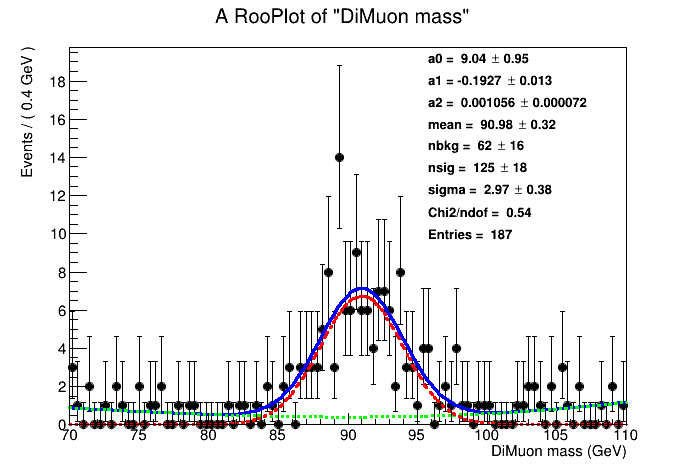

In [26]:
frame = fit_unbinned_gauss_Z_with_background(data, mass, nbins)

# Draw the frame on the canvas
canvas = ROOT.TCanvas("canvas", "Z Candidates")
frame.Draw()
canvas.Draw()

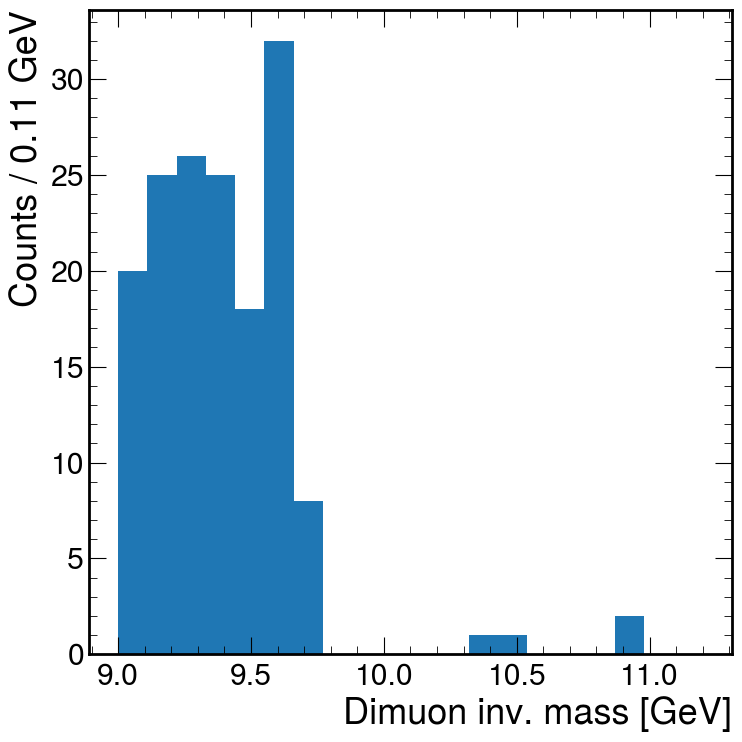

In [28]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 20, 9, 11.2
plt.hist(ak.flatten(B_J_mass), bins=nbins, range=(xlow, xhigh))
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("Dimuon inv. mass [GeV]")
plt.tight_layout()

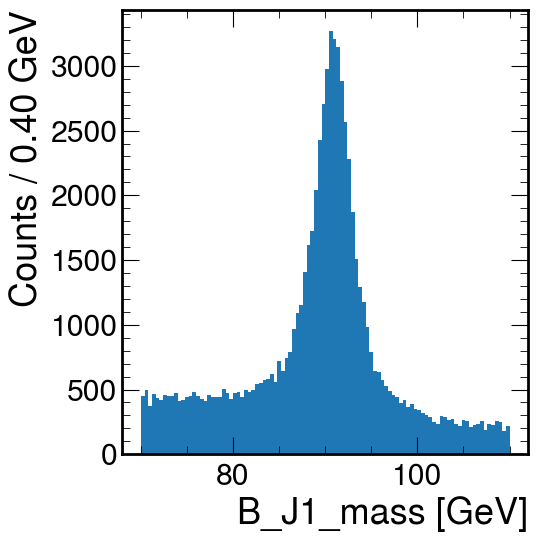

In [54]:
plt.figure(figsize=(6, 6))
nbins, xlow, xhigh = 100, 70, 110
plt.hist(ak.flatten(branches['B_J1_mass']), bins=nbins, range=(xlow, xhigh))
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("B_J1_mass [GeV]")
plt.tight_layout()

In [ ]:
plt.figure(figsize=(6, 6))
nbins, xlow, xhigh = 10, 60, 120
plt.hist(ak.flatten(branches['B_J1_mass']), bins=nbins, range=(xlow, xhigh))
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("B_J1_mass [GeV]")
plt.tight_layout()